# handling missing value
you have two options

---


[1] erase entire row [not more useable] this is kwonwn as complete case analysis (CCA) list wise deletion of cases

assumption in cca :: when you are sure that your data in missing comletely at random (MCAR)

percentage of missing value is 5% of your data

easy to implement

no need data manupalation

data distribution does not effect

---




[2] fill that missing value by two way univariate and multivariate

in univaruate two type numerical and categorical

and multivariate include knn and iterative that both are class of the ml



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/data_science_job.csv')

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
df.shape

(19158, 13)

In [ ]:
cols= [var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9287,0.920,no_enrollment,Graduate,11.0,15.0
4274,0.843,no_enrollment,Graduate,3.0,170.0
4585,0.855,no_enrollment,Masters,15.0,10.0
3221,0.740,no_enrollment,Graduate,14.0,84.0
659,0.920,no_enrollment,Graduate,20.0,40.0


In [ ]:
len(df[cols].dropna()) / len( df)

0.8968577095730244

In [ ]:
new_df=df[cols].dropna()
df.shape,new_df.shape


((19158, 13), (17182, 5))

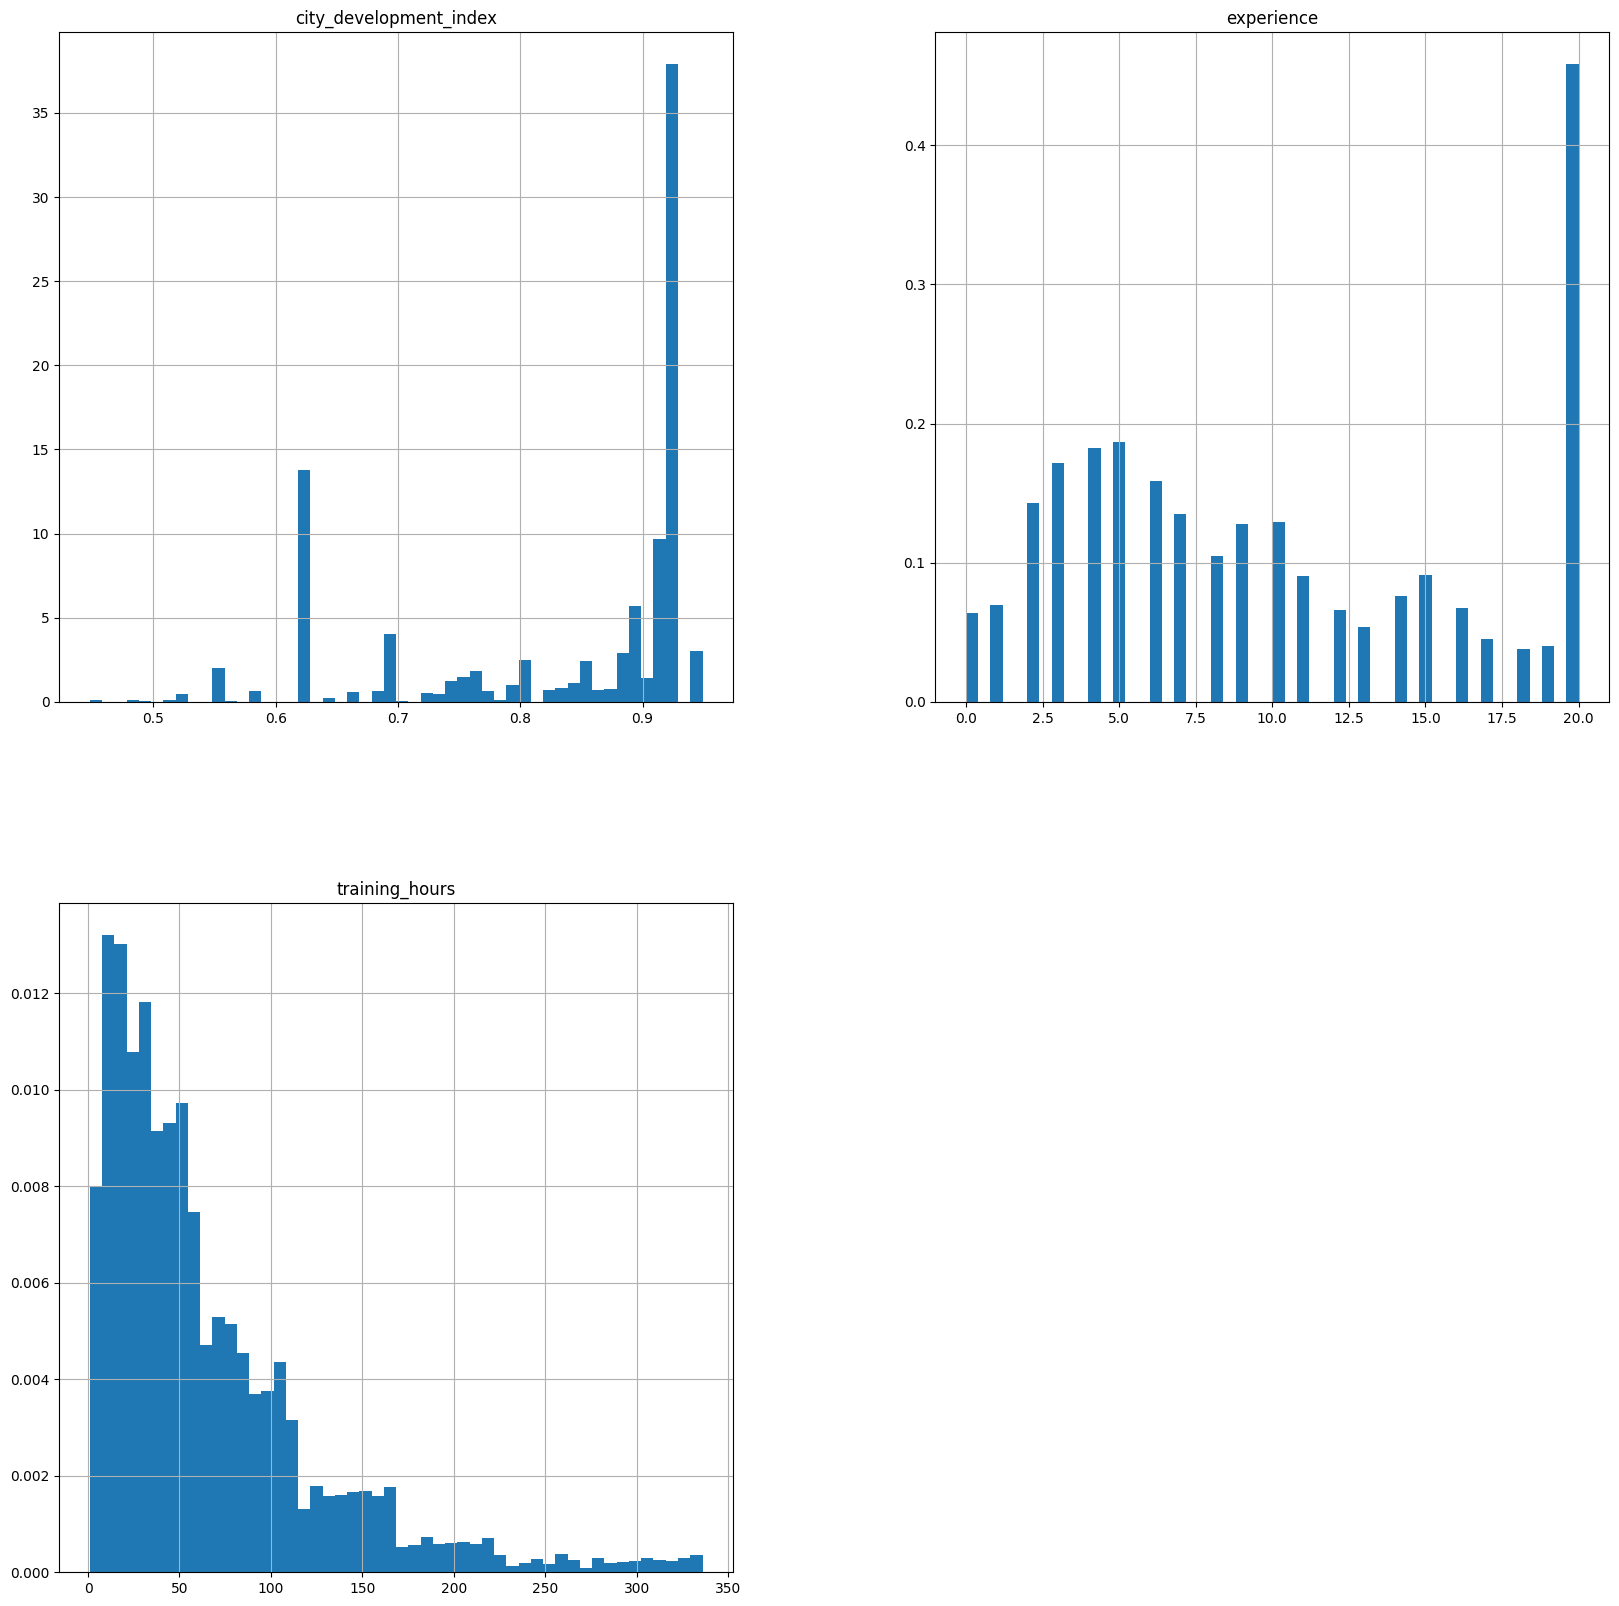

In [ ]:
new_df.hist(bins=50,density=True,figsize=(20,20))
plt.show()

In [ ]:
temp = pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)
],axis=1)
temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([
    df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)
],axis=1)
temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# univariate immputation for numerical data

mean/median  [simple ]

arbitary  

end of distribution

randomly




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/titanic_toy.csv')

In [ ]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [ ]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [ ]:
x = df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.shape ,x_test.shape

((712, 3), (179, 3))

In [ ]:
x_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [ ]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [ ]:
x_train['Age'].fillna(mean_age,inplace=True)
x_train['Fare'].fillna(mean_fare,inplace=True)

<ipython-input-13-0b2dfb2d7df9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Age'].fillna(mean_age,inplace=True)
<ipython-input-13-0b2dfb2d7df9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [ ]:
x_train.sample(10)

,Age,Fare,Family
176,29.785904,25.466700,4
487,58.000000,29.700000,0
620,27.000000,14.454200,1
345,24.000000,13.000000,0
490,29.785904,32.617597,1
442,25.000000,7.775000,1
127,24.000000,7.141700,0
847,35.000000,7.895800,0
849,29.785904,89.104200,1
392,28.000000,7.925000,2


AFTER IMPUTATION CALCULATE VARIANCE

---


FOR CHECKING THAT IT SHOUD BE NOT DRASTIC CHANGE

In [ ]:
# NOW USING SKLEARN
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [ ]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([29.78590426])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([15.5])

In [ ]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [ ]:
x_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [ ]:
#ARBITARY VALUE IMPUTATION
x_train=pd.DataFrame(x_train, columns=['Age', 'Fare', 'Pclass']) # Add column names back to x_train
x_test=pd.DataFrame(x_test, columns=['Age', 'Fare', 'Pclass'])   # Add column names back to x_test

x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_minus1']=x_train['Age'].fillna(-1)

x_train['Fare_99']=x_train['Fare'].fillna(999)
x_train['Fare_minus1']=x_train['Fare'].fillna(-1)

# handlling categorical data



*  most freqent missing imputation [mode replacement]
*  make one another category



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/house daatset train.csv.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()



,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0.5, 1.0, 'GarageQual')

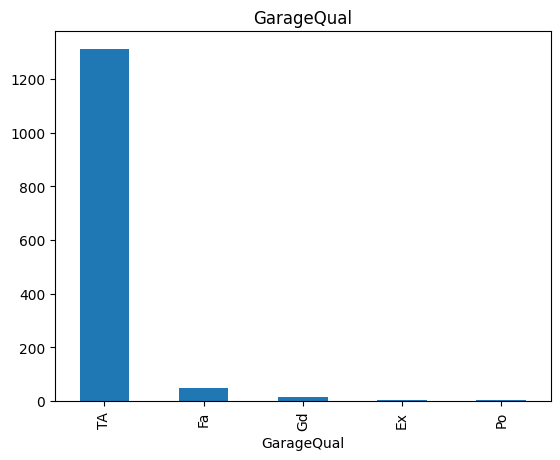

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

plt.title('GarageQual')

In [ ]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

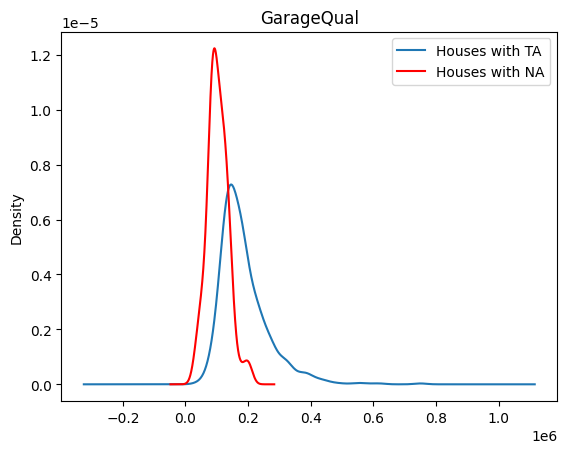

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()

labels=['Houses with TA','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

In [ ]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [ ]:
df['GarageQual'].fillna('TA',inplace=True)

<ipython-input-33-f3714f1e83eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

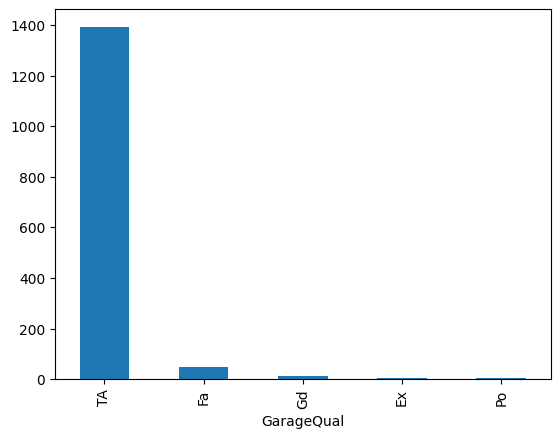

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

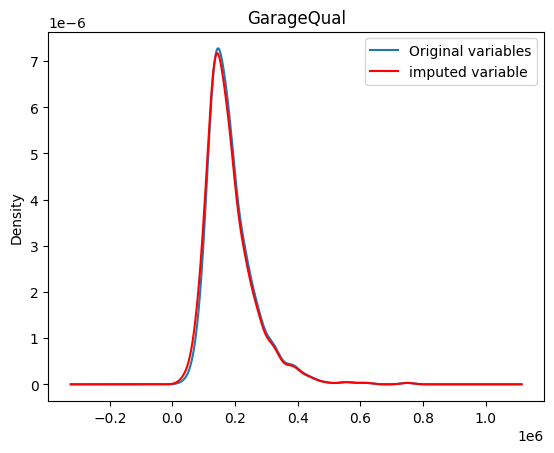

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()

labels=['Original variables','imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

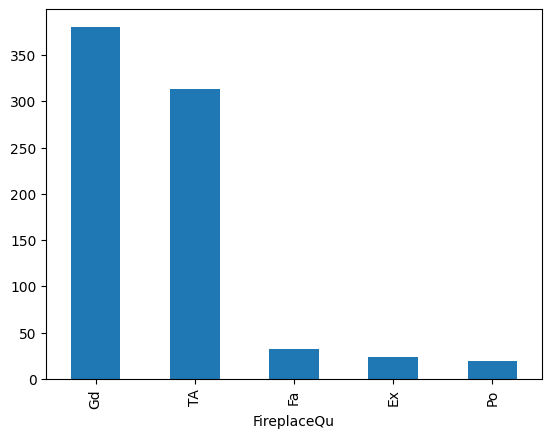

In [ ]:

df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

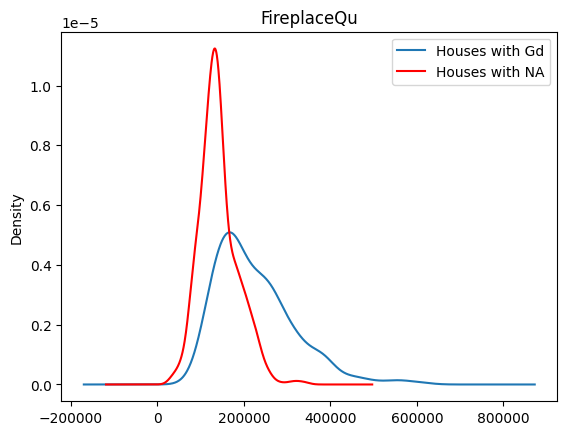

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()

labels=['Houses with Gd','Houses with NA']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

In [ ]:
temp =df[df['FireplaceQu']=='Gd']['SalePrice']


<ipython-input-40-70ecd59850d5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

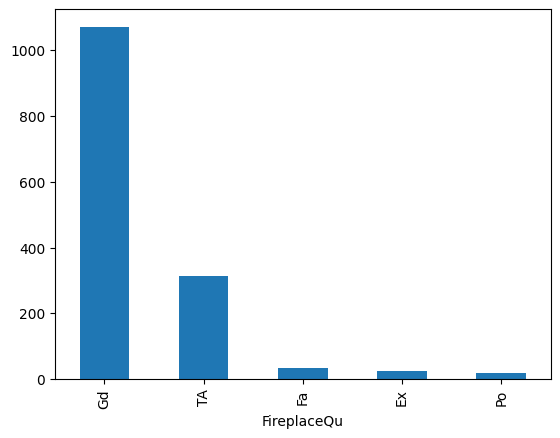

In [ ]:
df['FireplaceQu'].fillna('Gd',inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

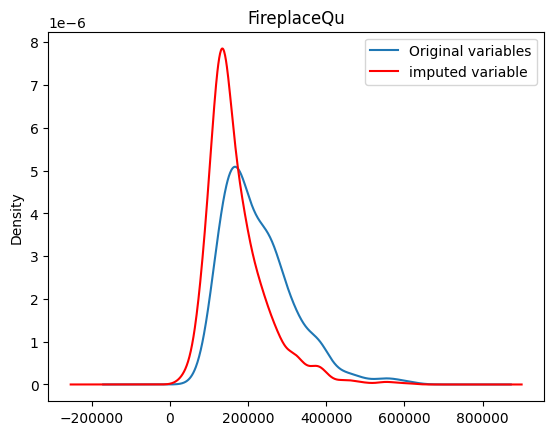

In [ ]:
# Check if 'temp' is empty before plotting

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()

labels = ['Original variables', 'imputed variable']
ax.legend(lines, labels, loc='best')
plt.title('FireplaceQu')


**you can do it by sklearn too**

# Knn IMPUTER

here consider mainly knn algorithm and for missing value use **nan-euclidian** algorithm

---
cinsider official document of the nan-euclidiand and knn imputer theory

---
more accurate

more number of calculation for big dataset

when you deploy at server you need to deploy your all training data set on the server




In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Pclass','Fare','Survived'])

In [ ]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
df.isnull().mean()*100

,0
Survived,0.00000
Pclass,0.00000
Age,19.86532
Fare,0.00000


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.head()

,Pclass,Age,Fare
30,1,40.0,27.7208
10,3,4.0,16.7000
873,3,47.0,9.0000
182,3,9.0,31.3875
876,3,20.0,9.8458


In [ ]:
knn=KNNImputer()
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)

In [ ]:
pd.DataFrame(x_train_trf,columns=x_train.columns)

,Pclass,Age,Fare
0,1.0,40.0,27.7208
1,3.0,4.0,16.7000
2,3.0,47.0,9.0000
3,3.0,9.0,31.3875
4,3.0,20.0,9.8458
...,...,...,...
707,3.0,30.0,8.6625
708,3.0,24.4,8.7125
709,1.0,71.0,49.5042
710,1.0,33.6,221.7792


In [ ]:
lr=LogisticRegression()
lr.fit(x_train_trf,y_train)
y_pred=lr.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7039106145251397